In [5]:
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.preprocessing import image

import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from tqdm import tqdm

import tensorflow as tf

In [107]:
pd.set_option('display.max_rows', 400)

In [7]:
tf.__version__

'2.1.0'

## Create Subset DF 

In [33]:
df = pd.read_csv('images_targets.csv')
counts = pd.read_csv('value_counts.csv')

In [34]:
df.drop(columns = 'Unnamed: 0',inplace = True)
counts.drop(columns = 'Unnamed: 0',inplace = True)

In [37]:
df.drop(columns = 'status_code', inplace = True)

PATH FOR WORDS:
    
 '../text-recognition/' '  ' 

In [38]:
df.shape

(96456, 2)

In [39]:
df.head(2)

,image,target
0,a01-000u-00-00.png,A
1,a01-000u-00-01.png,MOVE


In [30]:
counts.head(2)

,target,value_count
0,the,4986
1,",",4376


In [40]:
sample = df.sample(n=5000, random_state=1)

In [42]:
sample.head()

,image,target
34983,e02-082-07-01.png,unhesitatingly
49619,g06-011h-03-10.png,which
74768,l01-199-03-04.png,have
43322,f07-028b-08-01.png,alone
67329,j01-042-05-06.png,be


## IMG plotting 

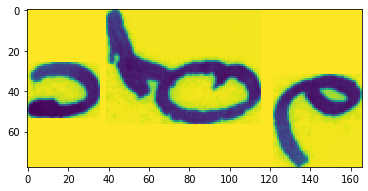

In [15]:
#Use matplotlibs "mpimg.imread" for plotting images


img=mpimg.imread('words/a01/a01-000u/a01-000u-00-03.png')

#Plot image var
imgplot = plt.imshow(img)

In [20]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        data_dir_test, 
        target_size=(64, 64),
        #classes =  [str(i) for i in np.arange(76)], 
        batch_size=100)

Found 10685 images belonging to 4 classes.


In [23]:
test_generator.filepaths

10685

In [47]:
sample.head()

,image,target
34983,e02-082-07-01.png,unhesitatingly
49619,g06-011h-03-10.png,which
74768,l01-199-03-04.png,have
43322,f07-028b-08-01.png,alone
67329,j01-042-05-06.png,be


In [59]:
for items in sample['image']:
    print(items)

e02-082-07-01.png
g06-011h-03-10.png
l01-199-03-04.png
f07-028b-08-01.png
j01-042-05-06.png
b01-049-03-00.png
e04-011-02-03.png
a04-054-03-03.png
a06-057-02-01.png
n02-016-04-01.png
n06-148-04-09.png
b01-118-04-00.png
b02-035-06-03.png
a01-049-03-04.png
g03-000-01-02.png
h07-000-05-01.png
e04-099-06-09.png
f02-020-05-10.png
g06-050a-05-00.png
e07-098-02-07.png
g01-070-07-04.png
a04-096-02-03.png
f01-143-05-03.png
r03-035-07-01.png
g03-040-06-01.png
j04-019-02-01.png
r06-115-02-04.png
a06-100-05-01.png
a02-050-01-07.png
r02-006-01-03.png
f02-038-00-02.png
b06-015-00-02.png
g02-073-03-06.png
n01-020-08-04.png
g06-026e-03-01.png
g07-018a-06-11.png
n04-015-07-05.png
r03-065-00-00.png
b05-042-06-00.png
d06-037-05-00.png
g06-037k-08-04.png
r02-038-00-06.png
b05-074-06-03.png
h07-051b-07-01.png
h02-043-01-02.png
h07-028-06-02.png
g01-037-01-01.png
j06-018-03-03.png
b01-009-04-06.png
k04-110-09-06.png
h07-037-02-00.png
m06-091-06-04.png
c03-007a-03-00.png
d06-086-07-06.png
g06-050d-02-05.png
g

In [ ]:
# #Navigate local file trees utilizing native OS 


# for root, dirs, files in os.walk("words"):
#     for name in files:
#         test_array.append(os.path.join(root, name))
#     for name in dirs:
#         test_array.append(os.path.join(root, name))
#     #for new in name:
#         #if '.png' in new:
#            # png_array.append(os.path.join(root, name))

In [94]:
df_train.head()

,image,status_code,target
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE
2,a01-000u-00-02,ok,to
3,a01-000u-00-03,ok,stop
4,a01-000u-00-04,ok,Mr.


In [92]:
## Example of grabbing image paths from DF


# Reading the training images
train_image = []
for i in tqdm(df_train['image']):
    img = image.load_img('../text-recognition/train_words/'+ i + '.png', target_size=(28,28,1), color_mode = 'grayscale')
    #img = image.img_to_array(img)
    #img = img/255
    #train_image.append(img)
#X = np.array(train_image)

  0%|          | 0/38745 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '../text-recognition/train_words/a01-000u-00-00.png'

## Import and Map Train,  Validate,  Test Sets

In [127]:

def text_to_df(text_file):
    
    """Function receives text file(string) as input, and will select image.png name, status code, and target name, and return a pandas DataFrame object"""
    
    text_object = open(text_file)
    
    words_text = text_object.readlines()
    
    comma_separated = []
    #split text values into comma separated values
    
    for x in words_text: 
        comma_separated.append(x.split())
    
    images = []
    targets = []
    status_code = []

    for target in comma_separated:
        images.append(target[0])
        status_code.append(target[1])
        targets.append(target[-1])
        
    img_array = np.array(images)
    target_array = np.array(targets)
    status_array = np.array(status_code)
    
    img_series = pd.Series(img_array)
    target_series = pd.Series(target_array)
    status_series = pd.Series(status_array)
    
    img_df = pd.DataFrame(img_series)
    target_df = pd.DataFrame(target_series)
    status_df = pd.DataFrame(status_series)
    
    df_1 = img_df.merge(status_df, left_index=True, right_index=True)
    df = df_1.merge(target_df, left_index = True, right_index = True)
    
    df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)
    
    return df

In [73]:
df_train = text_to_df('train.txt')
df_validate1 = text_to_df('validate1.txt')
df_validate2 = text_to_df('validate2.txt')
df_test = text_to_df('test.txt')

In [108]:
df_train.shape

(38745, 3)

In [121]:
train_words = pd.DataFrame(df_train['target'].value_counts())

In [122]:
train_words = train_words.reset_index()

In [123]:
train_words = train_words.rename(columns = {'index': 'target', 'target': 'value_count'})

In [125]:
train_words.head(50)

,target,value_count
0,the,2132
1,.,1655
2,",",1591
3,of,1137
4,to,958
5,and,767
6,a,755
7,in,683
8,"""",613
9,is,520


In [87]:
df_validate1[df_validate1['status_code'] == 'err'].shape

(984, 3)

In [126]:
df_train[df_train['target'] == 'the']

,image,status_code,target
34,a01-000u-04-05,ok,the
86,a01-000x-03-07,ok,the
123,a01-003-02-02,ok,the
137,a01-003-04-01,ok,the
158,a01-003-07-01,ok,the
...,...,...,...
38678,d07-102-00-07,ok,the
38699,d07-102-03-00,ok,the
38704,d07-102-03-05,ok,the
38712,d07-102-04-01,ok,the


In [80]:
df_train.head()

,image,status_code,target
0,a01-000u-00-00,ok,A
1,a01-000u-00-01,ok,MOVE
2,a01-000u-00-02,ok,to
3,a01-000u-00-03,ok,stop
4,a01-000u-00-04,ok,Mr.


In [68]:
df_validate1.shape

(6666, 3)

In [69]:
df_validate2.shape

(6865, 3)

In [79]:
df_test.head()

,image,status_code,target
0,g01-000-00-00,ok,A
1,g01-000-00-01,ok,Scottish
2,g01-000-00-02,ok,knight
3,g01-000-00-03,ok,-
4,g01-000-00-04,ok,Sir


In [2]:
directory_test = '../text-recognition/new_words'

In [3]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        directory_test, 
        target_size=(64, 64),
        #classes =  [str(i) for i in np.arange(76)], 
        batch_size=100)

Found 23913 images belonging to 20 classes.
